In [29]:
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
root_logdir = os.path.join(os.curdir, "my_logs")

In [ ]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [5]:
fashion_mnist_dataset = keras.datasets.fashion_mnist

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist_dataset.load_data()

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [8]:
fashion_class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

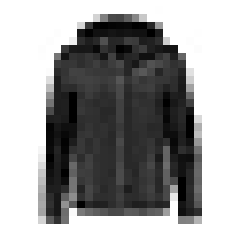

In [23]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [13]:
# 1.
model = keras.models.Sequential()
# 2.
model.add(keras.layers.Flatten(input_shape=[28, 28]))
# 3.
model.add(keras.layers.Dense(300, activation="relu"))
# 4.
model.add(keras.layers.Dense(100, activation="relu"))
# 5.
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [15]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
   1/1719 [..............................] - ETA: 0s - loss: 2.4195 - accuracy: 0.0312WARNING:tensorflow:From C:\Users\dpwanjala\.conda\envs\cp\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7185 - accuracy: 0.7647 - val_loss: 0.5119 - val_accuracy: 0.8264

In [17]:
model.save("fashion_classifier_keras_model.h5")

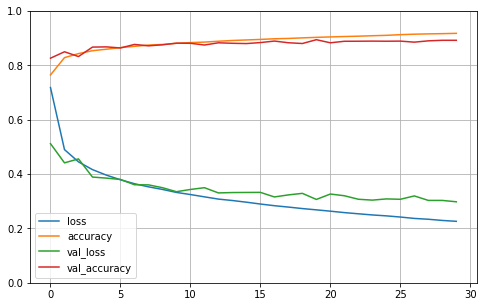

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3355 - accuracy: 0.8828

[0.33551502227783203, 0.8827999830245972]

In [ ]:
X_new = X_test[:3]
y_probability = model.predict(X_new)
y_probability.round(2)

In [28]:
y_pred = model.predict_classes(X_new)
y_pred


array([9, 2, 1], dtype=int64)

In [27]:
print("hello")

hello
